# Deskew in X direction
Deskew data thats sheared in X direction

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

cle.get_device()

<NVIDIA GeForce RTX 3080 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
#Image acquired using Janelia lattice

voxel_size_x_in_microns = 0.1028
voxel_size_y_in_microns = 0.1028
voxel_size_z_in_microns = 0.359712  

deskewing_angle_in_degrees = 31.5

The example image data shown below was kindly provided by 
[Ms Cindy Evelyn](https://imaging.wehi.edu.au/about-us/cindy-evelyn), [Dr Niall Geoghegan](https://imaging.wehi.edu.au/about-us/niall-geoghegan) and [Dr. Kelly Rogers](https://imaging.wehi.edu.au/about-us/kelly-rogers) from the [Centre for Dynamic Imaging, WEHI, Melbourne, Australia](https://imaging.wehi.edu.au/) who used lattice light sheet microscopy to capture red blood cells and study the [malaria parasite invasion process](https://www.nature.com/articles/s41467-021-23626-7). The data is acquired using the Janelia lattice lightsheet system.

In these so called raw data images taken with dual objective lattice light sheet microscopes, the Z-plane is swept through the sample in a tilted way. This is not obvious when studying the Z-planes of the given stack:

Original image shape (140, 290, 200)


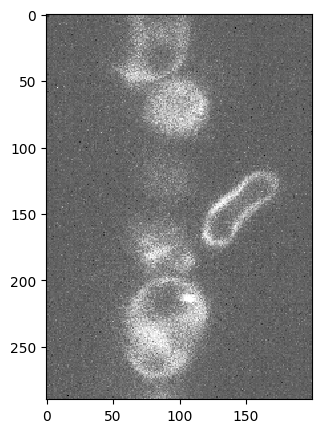

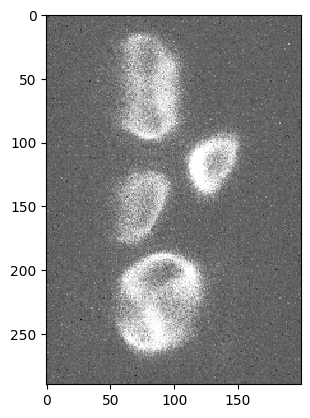

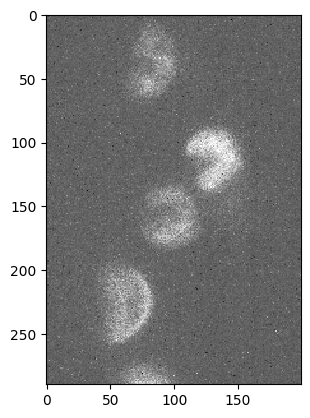

In [3]:
original_image = imread('../../data/45_CamA_ch0_stack0006_488nm_0016799msec_0013438399msecAbs-1.tif')

print("Original image shape", original_image.shape)
fig, axs = plt.subplots(1, 1, figsize=(15,5))

cle.imshow(original_image[25])
cle.imshow(original_image[50])
cle.imshow(original_image[110])


### Deskew in X direction

In [4]:
deskewed_x = cle.deskew_x(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,flip_z=True)

print(deskewed_x.shape)


(104, 290, 660)


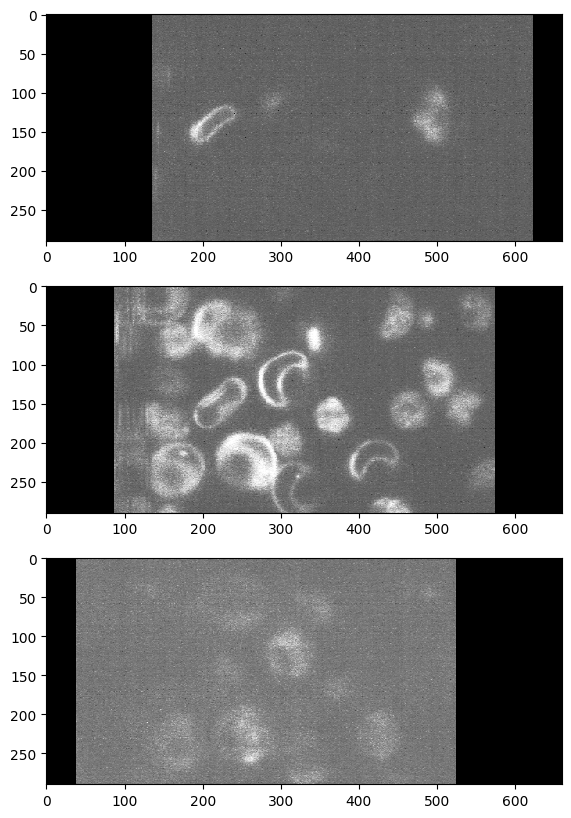

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))


cle.imshow(deskewed_x[20], plot=axs[0])
cle.imshow(deskewed_x[50], plot=axs[1])
cle.imshow(deskewed_x[80], plot=axs[2])

In [6]:
import napari 
viewer = napari.Viewer()
viewer.add_image(deskewed_x)
viewer.add_image(original_image)

<Image layer 'original_image' at 0x2ab18af4370>

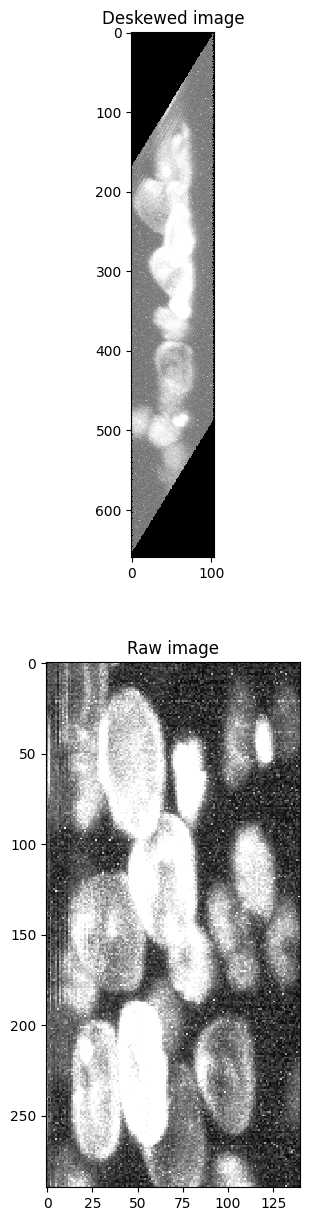

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(5,15))

cle.imshow(cle.maximum_y_projection(deskewed_x).T, plot=axs[0])
axs[0].title.set_text("Deskewed image")
cle.imshow(cle.maximum_x_projection(original_image), plot=axs[1])
axs[1].title.set_text("Raw image")

## View in napari

In [12]:
#Lines commented out so
import napari
viewer = napari.Viewer()

viewer.add_image(original_image)
viewer.add_image(deskewed_x)


<Image layer 'deskewed_x' at 0x2ab1790cb20>

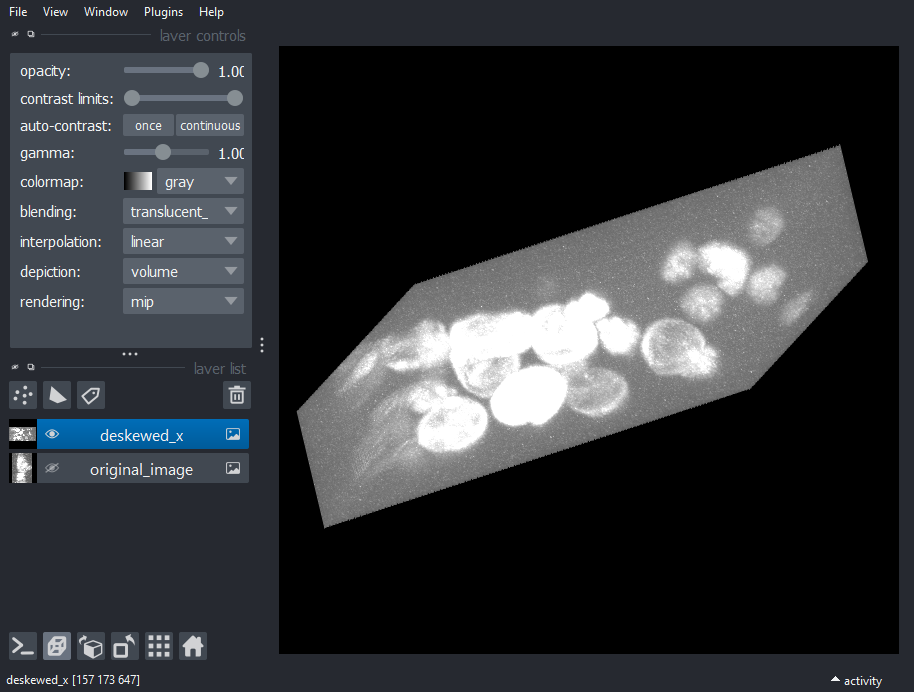

In [13]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)